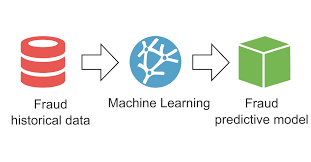

# Online Payment Fraud Detection
Online payment fraud detection is a common problem that businesses face when processing payments online. The goal is to detect fraudulent transactions before they are processed and approved, in order to prevent financial losses and protect the business and its customers.

One approach to tackle this problem is

**Transaction monitoring** : This involves using machine learning algorithms to analyze transactions in real-time, looking for patterns or anomalies that may indicate fraud. For example, a sudden increase in the number of transactions or a change in transaction patterns may indicate fraudulent activity.

Hence, inorder to identify online payment fraud with machine learning, we need to train a machine learning model for classifying fraudulent and non-fraudulent payments.

# About Dataset
There are 6362620 rows and 11 columns in our dataset.

* step: represents a unit of time where 1 step equals 1 hour
* type: type of online transaction
* amount: the amount of the transaction
* nameOrig: customer starting the transaction
* oldbalanceOrg: balance before the transaction
* newbalanceOrig: balance after the transaction
* nameDest: recipient of the transaction
* oldbalanceDest: initial balance of recipient before the transaction
* newbalanceDest: the new balance of recipient after the transaction
* isFraud: fraud transaction
* isFlaggedFraud: Flagged fraud transaction

In [1]:
import numpy as np
import pandas as pd


In [2]:
pip install opendatasets --upgrade --quiet

Note: you may need to restart the kernel to use updated packages.


In [3]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: piyushpankaj96
Your Kaggle Key: ········


100%|██████████| 178M/178M [00:13<00:00, 14.0MB/s] 


In [ ]:
df = pd.read_csv('online-payments-fraud-detection-dataset/PS_20174392719_1491204439457_log.csv')
df.head()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
# checking null values
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

There are no null values in our dataset.

In [10]:
df.duplicated().sum()

0

There are no duplicate values in our dataset.

**Checking values for few object type columns**

In [11]:
df.nameOrig.value_counts()

C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: nameOrig, Length: 6353307, dtype: int64

In [13]:
df.nameDest.value_counts()

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: nameDest, Length: 2722362, dtype: int64

In [14]:
df.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [15]:
df.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [16]:
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

# Exploratory Data Analysis

## Univariate Analysis
Univariate analysis is used to analyze the data of single variable. Here we will analyze using histplot

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
features=['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

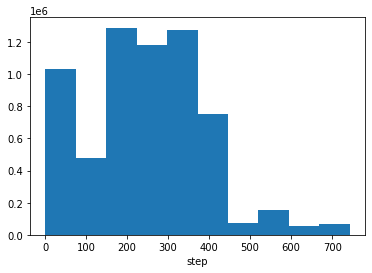

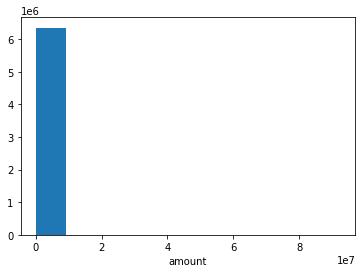

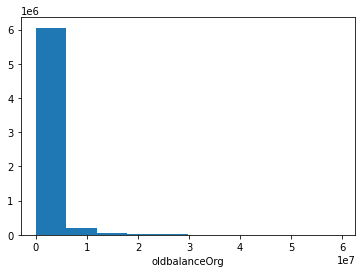

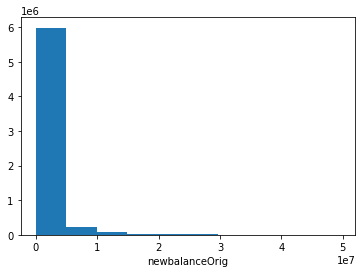

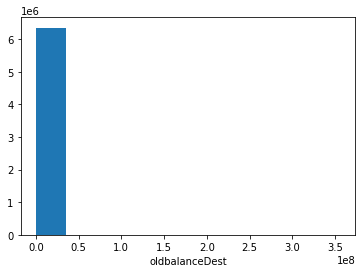

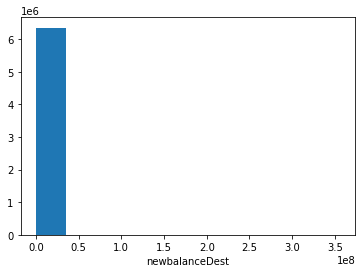

In [19]:
for feature in features:
    plt.xlabel(feature)
    plt.hist(df[feature])
    plt.show()

We could see some outliers in the plots. So let's work on it.

We'll use Quantile-based Flooring and Capping for these columns.

**Capping** is replacing all higher side values exceeding a certain theoretical maximum or upper control limit (UCL) by the UCL value. Here we'll do 90th percentile for higher values.

**Flooring** is replacing all values falling below a certain theoretical minimum or lower control limit (UCL) by the LCL value. Here we'll do 90th percentil

In [20]:
features=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

In [21]:
for feature in features:
    print(feature)
    print(df[feature].quantile(0.10))
    print(df[feature].quantile(0.90))

    print('\n')

amount
4501.3
365423.30900000007


oldbalanceOrg
0.0
1822508.289000007


newbalanceOrig
0.0
1970344.7930000005


oldbalanceDest
0.0
2914266.6690000016


newbalanceDest
0.0
3194869.671000002




Now we'll remove the outliers.

In [24]:
for feature in features:
    lower = df[feature].quantile(0.10)
    upper = df[feature].quantile(0.90)
    df[feature] = np.where(df[feature] <lower, lower,df[feature])
    df[feature] = np.where(df[feature] >upper, upper,df[feature])
    print('Feature: ',feature)
    print('Skewness value: ',df[feature].skew())
    print('\n')

Feature:  amount
Skewness value:  0.8046460444556197


Feature:  oldbalanceOrg
Skewness value:  2.249361299814406


Feature:  newbalanceOrig
Skewness value:  2.2262847493216786


Feature:  oldbalanceDest
Skewness value:  1.4173123924260833


Feature:  newbalanceDest
Skewness value:  1.3593024983493058




Now we'll take a look at it after removing outliers.

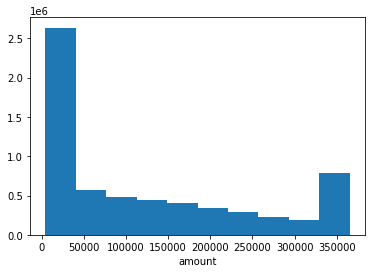

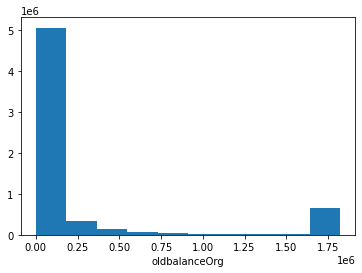

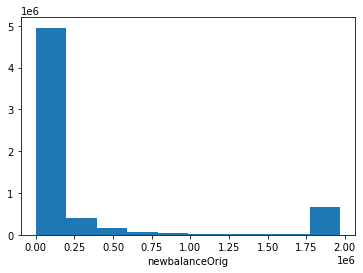

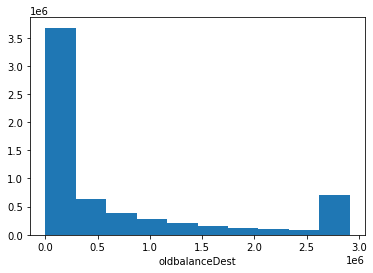

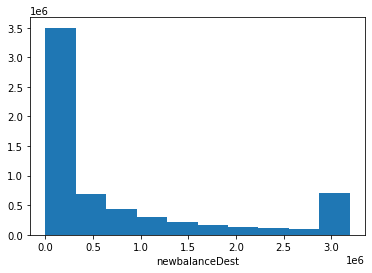

In [32]:
for feature in features:
    plt.xlabel(feature)
    plt.hist(df[feature])
    plt.show()

After outlier treatment

* We have a maximum set of distribution between 150 to 400 of step
* Amount ranges between 0-35 lakhs with more values ranging between 0-75,000
* OldbalanceOrg ranges around 0-18 lakh with more frequency around 0-375,000
* NewbalanceOrig ranges around 0-19 lakh with more frequency around 0-375,000
* OldbalanceDest ranges around 0-29 lakh with common values around 0-625,000
* NewbalanceDest ranges around 0-35 lakh with common values around 0-625,000

Let's take a closer look at 'type' column.

In [27]:
df.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

* As we have already seen there are 5 types of payment happened.
* More money has been transacted mostly through cash out followed by payment type.

Let's plot it using horizontal bar

<AxesSubplot:>

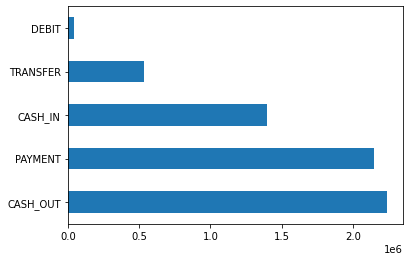

In [34]:
df.type.value_counts().plot(kind='barh')

<AxesSubplot:xlabel='type', ylabel='count'>

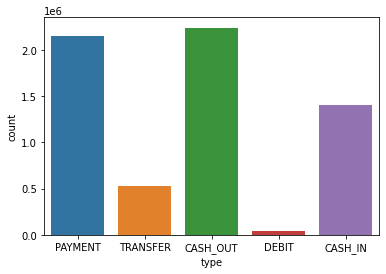

In [35]:
sns.countplot(x='type', data=df)

Let's look at the relationship with type column with isfraud column.



In [36]:
cross_tab_result=pd.crosstab(index=df.type,columns=df.isFraud)
cross_tab_result

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


We can see that fraud occurred mostly while during transfer or cashout.



<AxesSubplot:xlabel='type'>

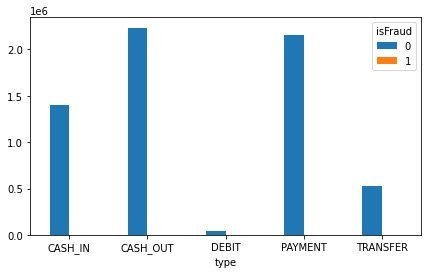

In [37]:
cross_tab_result.plot.bar(figsize=(7,4), rot=0)


<AxesSubplot:xlabel='type'>

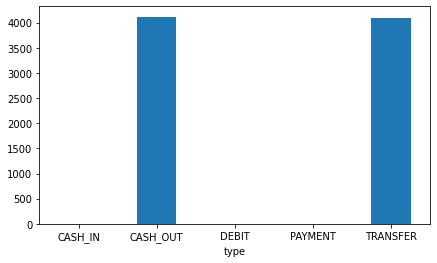

In [38]:
cross_tab_result[1].plot.bar(figsize=(7,4), rot=0)


(3500.0, 7000.0)

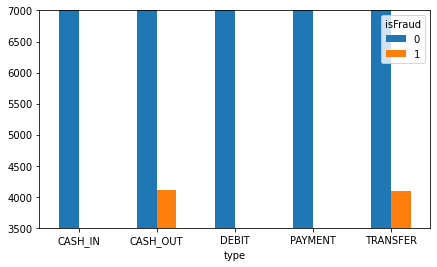

In [39]:
cross_tab_result.plot.bar(figsize=(7,4), rot=0)
plt.ylim([3500, 7000])

In [40]:
cashout= (2233384 + 4116)
cashout_fraud= 4116/(cashout) * 100
cashout_fraud

0.18395530726256984

0.184 % denotes the percentage of fraud happened in total cashout mode type, which is very less %.

In [41]:
transfer= 528812+4097
transfer_fraud = 4097/(transfer) * 100
transfer_fraud

0.7687991758442811

0.769 % denotes the percentage of fraud happened in total tranfer mode type, which is very also less %.

Let's take a closer look at amount column

In [42]:
df.amount

0            9839.640
1            4501.300
2            4501.300
3            4501.300
4           11668.140
              ...    
6362615    339682.130
6362616    365423.309
6362617    365423.309
6362618    365423.309
6362619    365423.309
Name: amount, Length: 6362620, dtype: float64

In [43]:
print('Minimum: ',df.amount.min())
print('Maximum: ',df.amount.max())

Minimum:  4501.3
Maximum:  365423.30900000007


(array([2634731.,  571908.,  486296.,  447018.,  399528.,  343125.,
         284507.,  231500.,  183992.,  780015.]),
 array([  4501.3   ,  40593.5009,  76685.7018, 112777.9027, 148870.1036,
        184962.3045, 221054.5054, 257146.7063, 293238.9072, 329331.1081,
        365423.309 ]),
 <BarContainer object of 10 artists>)

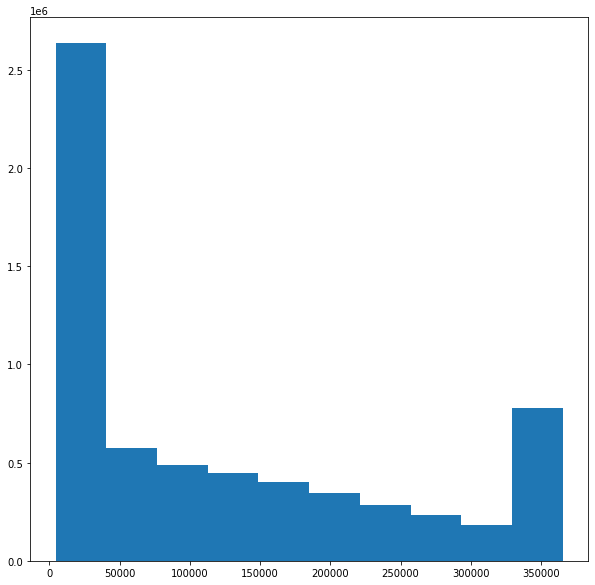

In [46]:
plt.figure(figsize=(10,10))
plt.hist(df.amount)

Let's check the relationship of amount column with isFraud column.



<AxesSubplot:title={'center':'amount'}, xlabel='isFraud'>

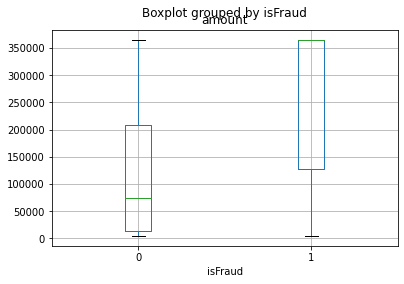

In [49]:
df.boxplot(column='amount', by='isFraud')


Fraud amount transaction range is between 1.3-3.6 lakh.

 Let's take a closer look at isFlaggedFraud column.



In [50]:
df.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

From the total of 63 lakh records only 16 were assumed and flagged as fraud, which is actually a very low number. The actual fraud happend has a very higher value when compared to isFlaggedFraud column.

Now let's look at how many values they assumed and flagged as fraud is actually correct.

In [51]:
flagged_fraud_records = df[(df.isFraud==1) & (df.isFlaggedFraud==1)]
flagged_fraud_records

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,365423.309,C728984460,1822508.289,1970344.793,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,365423.309,C1100582606,1343002.080,1343002.080,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,365423.309,C1035541766,536624.410,536624.410,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,365423.309,C908544136,1822508.289,1970344.793,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,365423.309,C689608084,1822508.289,1970344.793,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,365423.309,C452586515,1822508.289,1970344.793,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,365423.309,C193696150,1822508.289,1970344.793,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.220,C1684585475,353874.220,353874.220,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,365423.309,C786455622,1822508.289,1970344.793,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,365423.309,C19004745,1822508.289,1970344.793,C1806199534,0.0,0.0,1,1


In [52]:
flagged_fraud_records.shape

(16, 11)

This denotes that all the records which were flagged as fraud were correct.



Now let's look at the percentage of records which were flagged as fraud to the total fraud that happened.

In [53]:
total_fraud= df[df.isFraud ==1]
total_fraud = total_fraud.shape[0]
total_fraud

8213

In [54]:
total_isflaggedFraud= flagged_fraud_records.shape[0]
total_isflaggedFraud

16

In [55]:
flagged_percent = total_isflaggedFraud/total_fraud * 100
print('Percentage of flagged fraud: ',round(flagged_percent,3))

unflagged_percent= (total_fraud-total_isflaggedFraud)/total_fraud * 100
print('Percentage of incorrectly flagged fraud: ',round(unflagged_percent,3))

Percentage of flagged fraud:  0.195
Percentage of incorrectly flagged fraud:  99.805


As we can see the percentage of records which are flagged as fraud is 0.195% which is very very less.

Let's take a closer look at isFraud column

In [56]:
total_transactions = df.shape[0]

fraud_transaction = df[df.isFraud==1].shape[0]

fraud_percent= fraud_transaction/total_transactions * 100
fraud_percent

0.12908204481801522

In [57]:
print('Total transactions: ',total_transactions)
print('Total fraud transactions happened: ',fraud_transaction)
print("Total fraud transaction percent: ",round(fraud_percent,2))


Total transactions:  6362620
Total fraud transactions happened:  8213
Total fraud transaction percent:  0.13


In [59]:
fraud_amount= df[df.isFraud==1]
fraud_amount=fraud_amount.sort_values(by=['amount'],ascending=False)
fraud_amount

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5188057,367,CASH_OUT,365423.309,C1210833971,435867.160,0.000,C363013236,186826.40,622693.550,1,0
5990227,416,CASH_OUT,365423.309,C2110305720,1822508.289,0.000,C225008798,523626.59,3194869.671,1,0
5990225,416,CASH_OUT,365423.309,C246726057,1822508.289,0.000,C1786144514,2423749.18,3194869.671,1,0
5990224,416,TRANSFER,365423.309,C298387535,1822508.289,1970344.793,C662194461,0.00,0.000,1,0
5988262,415,CASH_OUT,365423.309,C2137951962,1675153.280,0.000,C309573869,12832.26,1687985.530,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6002113,428,CASH_OUT,4501.300,C1838531308,3037.670,0.000,C505532836,800854.71,803892.380,1,0
6002112,428,TRANSFER,4501.300,C1408814433,3037.670,0.000,C944070846,0.00,0.000,1,0
1796322,162,TRANSFER,4501.300,C1172437299,151.000,0.000,C315826176,0.00,0.000,1,0
1796323,162,CASH_OUT,4501.300,C790340353,151.000,0.000,C517676411,386163.34,386314.340,1,0


<AxesSubplot:ylabel='Frequency'>

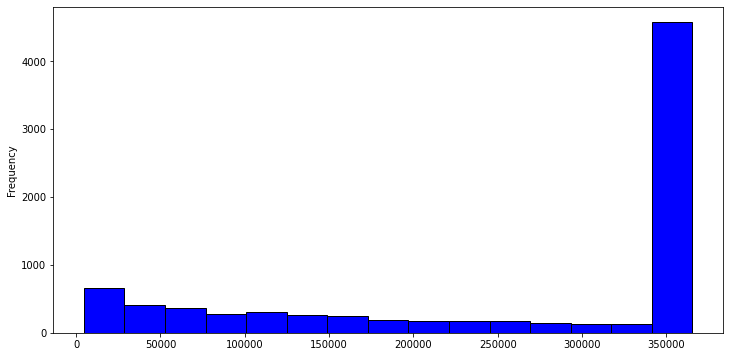

In [61]:
fraud_amount.amount.plot(kind='hist', bins=15, figsize=(12,6), facecolor='blue',edgecolor='black')

We've found that fraud amount transaction ranges between 1.3-3.6 lakh

Now, we can see that among them most occured were around 340,000-360,000 (3.4-3.6 lakh).

Let's take a closer look at nameDest column.

In [62]:
fraudster= df.nameDest.value_counts()
fraudster

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: nameDest, Length: 2722362, dtype: int64

Since we have large number of unique values, we'll take only top 10 fraudster id name.

Taking the top 10 fraudster ids

In [63]:
fraudster[:10]

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: nameDest, dtype: int64

<AxesSubplot:>

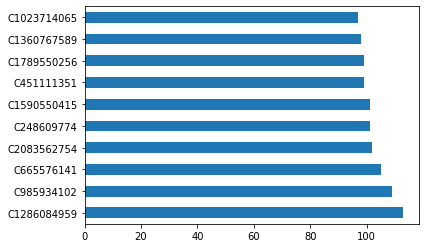

In [64]:
fraudster[:10].plot(kind='barh')

Let's take a closer look at step column.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='step', ylabel='Density'>

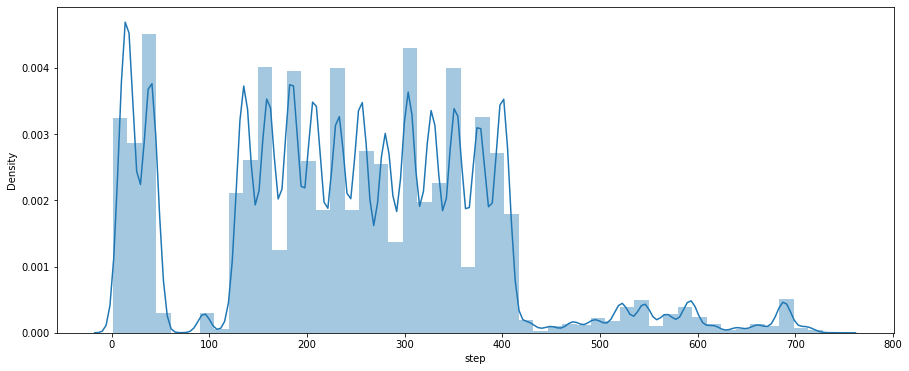

In [65]:
plt.figure(figsize=(15, 6))
sns.distplot(df['step'], bins=50)

There is a maximum distribution of 100 to 400 of step.

# Bivariate Analysis

<AxesSubplot:>

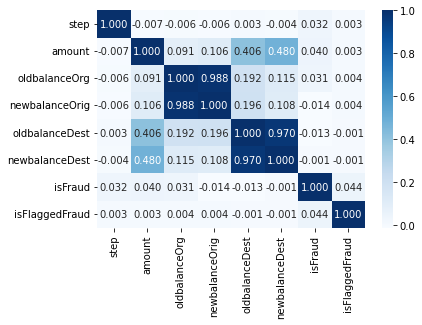

In [67]:
# calculate correlation matrix
corr = df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='Blues' ,fmt=".3f")

* There is a high correlation between newbalanceOrig and oldbalanceOrg.
* Also, between newbalanceDest and oldbalanceDest.
* Apart from that, we have a relatively high correlation between amount and newbalanceDest and amount with oldbalanceDest

# Data Preprocessing
Since the given dataset is highly imbalanced we need to balance the dataset before training our model.

In [68]:
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

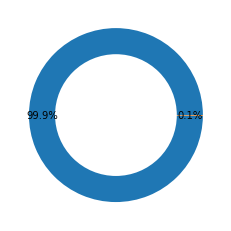

In [69]:
plt.pie(df.isFraud.value_counts(),
        autopct='%1.1f%%', pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [70]:
# class count
class_count_0, class_count_1 = df['isFraud'].value_counts()

# Separate class
class_0 = df[df['isFraud'] == 0]
class_1 = df[df['isFraud'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (6354407, 11)
class 1: (8213, 11)


## Under Sampling technique

total class of 1 and0: 0    8213
1    8213
Name: isFraud, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

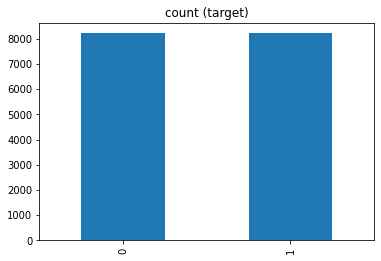

In [71]:
class_0_under = class_0.sample(class_count_1)

balanced_data = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and0:",balanced_data['isFraud'].value_counts())# plot the count after under-sampeling
balanced_data['isFraud'].value_counts().plot(kind='bar', title='count (target)')

In [72]:
balanced_data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4072645,300,CASH_OUT,200791.650,C801481960,4661.000,0.000,C272150083,272439.720,473231.370,0,0
2581881,207,CASH_OUT,43897.310,C1135600429,180.000,0.000,C2092574510,1550899.870,1594797.170,0,0
1772273,162,CASH_IN,121937.840,C1364746706,529727.850,651665.680,C1349183092,1422396.460,2174362.820,0,0
5247239,371,PAYMENT,4501.300,C177704524,0.000,0.000,M776835665,0.000,0.000,0,0
3903927,284,CASH_IN,261980.270,C1117906658,1822508.289,1970344.793,C1030706332,2914266.669,3194869.671,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.130,C786484425,339682.130,0.000,C776919290,0.000,339682.130,1,0
6362616,743,TRANSFER,365423.309,C1529008245,1822508.289,0.000,C1881841831,0.000,0.000,1,0
6362617,743,CASH_OUT,365423.309,C1162922333,1822508.289,0.000,C1365125890,68488.840,3194869.671,1,0
6362618,743,TRANSFER,365423.309,C1685995037,850002.520,0.000,C2080388513,0.000,0.000,1,0


In [73]:
balanced_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16426 entries, 4072645 to 6362619
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            16426 non-null  int64  
 1   type            16426 non-null  object 
 2   amount          16426 non-null  float64
 3   nameOrig        16426 non-null  object 
 4   oldbalanceOrg   16426 non-null  float64
 5   newbalanceOrig  16426 non-null  float64
 6   nameDest        16426 non-null  object 
 7   oldbalanceDest  16426 non-null  float64
 8   newbalanceDest  16426 non-null  float64
 9   isFraud         16426 non-null  int64  
 10  isFlaggedFraud  16426 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 1.5+ MB


In [74]:
balanced_data.type.unique()

array(['CASH_OUT', 'CASH_IN', 'PAYMENT', 'DEBIT', 'TRANSFER'],
      dtype=object)

In [75]:
balanced_data["type"] = balanced_data["type"].map({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5})


In [76]:
balanced_data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [77]:
X = balanced_data[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig']].values
y = balanced_data['isFraud'].values

# Splitting the Dataset

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the Dataset

In [79]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_train)
print(scaler.mean_)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

[2.27823440e+00 1.91322443e+05 4.97201632e+05 1.55604942e+05]


In [80]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_train = lab.fit_transform(y_train)
y_test = lab.fit_transform(y_test)

# Building the model and Fitting the Data


In [81]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score


In [82]:
models = {
    "LR": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "XGB": XGBClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVC": SVC()

}

In [83]:
for name, model in models.items():
    print(f'Training Model {name} \n--------------')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Training Accuracy: {accuracy_score(y_train, model.predict(X_train))}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print("Recall Score : ",recall_score(y_test, y_pred, pos_label='positive', average='micro'))    
    print("Precision Score : ",precision_score(y_test, y_pred,  pos_label='positive',average='micro'))     
    print(f"Testing F-1:", f1_score(y_test, y_pred, pos_label='positive', average='micro' )        )
    print(f"Testing F-Beta:", fbeta_score(y_test, y_pred, beta=0.5, pos_label='positive', average='micro'))
    print('-'*30)

Training Model LR 
--------------
Training Accuracy: 0.90441400304414
Testing Accuracy: 0.9026171637248935
Testing Confusion Matrix: 
[[1580   69]
 [ 251 1386]]
Recall Score :  0.9026171637248935
Precision Score :  0.9026171637248935
Testing F-1: 0.9026171637248935
Testing F-Beta: 0.9026171637248935
------------------------------
Training Model KNN 
--------------
Training Accuracy: 0.9882800608828006
Testing Accuracy: 0.9820450395617772
Testing Confusion Matrix: 
[[1594   55]
 [   4 1633]]
Recall Score :  0.9820450395617772
Precision Score :  0.9820450395617772
Testing F-1: 0.9820450395617772
Testing F-Beta: 0.9820450395617772
------------------------------
Training Model DT 
--------------
Training Accuracy: 0.9984779299847792
Testing Accuracy: 0.9914790018259282
Testing Confusion Matrix: 
[[1627   22]
 [   6 1631]]
Recall Score :  0.9914790018259282
Precision Score :  0.9914790018259282
Testing F-1: 0.9914790018259282
Testing F-Beta: 0.9914790018259282
------------------------------

As we see the XGBoost is the best algorithm with :

* accuracy : 99%
* F1 score : 99%

# Pick the best model

In [84]:
#Display the different parameter of the model
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


In [85]:
# Make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]


In [86]:
# Evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 99.30%


**Prediction for new data**

In [87]:
new_data = [[3,7839.64,190136.0,120296.24]]
if  model.predict(new_data)[0] == 0:
    print('not Fraud')
else: print('is Fraud')

is Fraud
